In [1]:
# # VERSION 5 (Rerolling small figures)

# import random
# import math as mt
# import numpy as np
# from PIL import Image
# import matplotlib.image as image
# from matplotlib import pyplot as plt
# from scipy import misc
# import copy
# import operator
# from IPython.display import clear_output
# import _pickle as cPickle
# import time
# import cv2

# random.seed(5)

# L = 255
# # (coordinates - [x,y])
        
# class Point2D:
        
#     def __init__(self,*,borders = [0, 0], coords = [-1, -1]):
#         if coords != [-1, -1] and borders == [0, 0]:
#             self.x = coords[0]
#             self.y = coords[1]
#             self.c = coords
#         else:
#             self.x = random.randint(0, borders[0]-1)
#             self.y = random.randint(0, borders[1]-1)
#             self.c = [self.x, self.y]
    
#     def get_l(self):
#         return mt.hypot(self.x, self.y)
        
#     def sort(points):
#         l_list = [p.get_l() for p in points]
#         points = [Point2D(coords = coord[::-1]) for coord in sorted(zip([point.y for point in points], [point.x for point in points]))]
#         return points
    
#     def cross(self, point):
#         self.x = int((self.x + point.x)/2)
#         self.y = int((self.y + point.y)/2)
#         self.c = [self.x, self.y]
    
#     def mutate(self, borders, mut_power):
#         self.x = int(min(self.x * (random.random()*(mut_power*2)+(1-mut_power)), borders[0]-1))
#         self.y = int(min(self.y * (random.random()*(mut_power*2)+(1-mut_power)), borders[1]-1))
#         return self
    
#     def to_list(self):
#         return [self.x, self.y]
    
#     def get_diff(self, point):
#         return mt.hypot(self.x - point.x, self.y - point.y) 
        

# class Circle:
    
#     def __init__(self, borders, limit):
#         self.c = Point2D(borders = borders)
#         # self.r = random.randint(0, int(max(borders[0], borders[1])/2))
#         self.r = random.randint(0, np.min([abs(self.c.x-borders[0]+1), abs(self.c.y-borders[1]+1),max(self.c.x-1,0), max(self.c.y-1,0)]))
#         if limit == 1:
#             self.rgb = [random.random(), random.random(), random.random()]
#         else:
#             self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
#         self.a = random.choice([0.3, 0.5, 0.7])
#         # self.to_string()
    
#     def to_string(self):
#         print('I AM CIRCLE')
#         print(f'radius {self.r}')
#         print(f'center {self.c.x} {self.c.y}')
#         print(f'a {self.a}')
#         print(f'rgb {self.rgb}')
        
#     def get_area(self):
#         return 2*mt.pi*(self.r**2)
    
#     def get_borders(self):
#         h = 2 * self.r + 1
#         w = 2 * self.r + 1
#         return h,w
    
#     def get_shift(self):
#         return (self.c.y-self.r - 1, self.c.x-self.r - 1)
     
#     def draw_figure(self):
#         h,w = self.get_borders()
#         # A = np.arange(-self.c.y + 1,h - self.c.y + 1)**2
#         # B = np.arange(-self.c.x + 1,w - self.c.x + 1)**2
#         # A = np.arange(0,h)**2
#         # B = np.arange(0,w)**2
#         A = np.arange(- np.ceil(h/2) + 1,h - np.ceil(h/2) + 1)**2
#         B = np.arange(- np.ceil(w/2) + 1,w - np.ceil(w/2) + 1)**2
#         dists = np.sqrt(A[:,None] + B)
#         matrix = (dists <= self.r).astype(np.uint8)
#         matrix = np.array([matrix*self.rgb[0], matrix*self.rgb[1], matrix*self.rgb[2]])
#         matrix = np.transpose(matrix, axes = (1,2,0))
#         return matrix, self.get_shift()
    
#     def check_belonging(self, point):
#         if (mt.hypot(point.x - self.c.x, point.y - self.c.y) < self.r):
#             return True
#         else:
#             return False
    
#     def cross(self, circ):
#         if random.random() > 0.5:
#             self.c.cross(circ.c)
#             self.r = int((self.r + circ.r)/2)
#         else:
#             self.rgb = [np.mean(k) for k in zip(self.rgb, circ.rgb)]
#             self.a = (self.a + circ.a)/2
#         return self
    
#     def mutate(self, borders, mut_power):
#         self.r = int(min(self.r * (random.random()*(mut_power*2)+(1-mut_power)), min((borders[1]-1)/2,(borders[0]-1)/2)))
#         self.c = self.c.mutate(borders, mut_power)
#         self.c = Point2D(borders = [0,0], coords = [max(min(self.c.x,borders[0]-self.r-1), self.r+1), max(min(self.c.y,borders[1]-self.r-1), self.r+1)])
        
#         self.rgb = [min(elem*(random.random()*(mut_power*2)+(1-mut_power)),255) for elem in self.rgb]
#         self.a = random.choice([0.3, 0.5, 0.7])
#         return self
    
# class Triangle:
    
#     def __init__(self, borders, limit):
#         self.v_list = [Point2D(borders = borders), Point2D(borders = borders), Point2D(borders = borders)]
#         if limit == 1:
#             self.rgb = [random.random(), random.random(), random.random()]
#         else:
#             self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
#         self.a = random.choice([0.3, 0.5, 0.7])
#         self.c = Point2D(coords = [np.mean(np.array(k)) for k in zip(self.v_list[0].c, self.v_list[1].c, self.v_list[2].c)])
#         # self.to_string()
    
#     def to_string(self):
#         print('I AM TRIANGLE')
#         print([[vertex.x, vertex.y] for vertex in self.v_list])
#         print(f'a {self.a}')
#         print(f'rgb {self.rgb}')
        
#     def get_area(self):
#         side_ls = [((p1.x-p2.x)**2+(p1.y-p2.y)**2)**0.5 for p1, p2 in zip(self.v_list, self.v_list[1:]+self.v_list[:1])]
#         hp = sum(side_ls)/2
#         self.area = (hp*np.prod([hp-ls for ls in side_ls]))**0.5
#         return self.area
    
#     def get_borders(self):
#         h = max([point.y for point in self.v_list])-min([point.y for point in self.v_list]) + 1
#         w = max([point.x for point in self.v_list])-min([point.x for point in self.v_list]) + 1
#         return h,w
    
#     def get_shift(self):
#         return (min([point.y for point in self.v_list]),min([point.x for point in self.v_list]))
    
#     def draw_figure(self):
#         h,w = self.get_borders()
#         shift = self.get_shift()
#         points = [np.subtract(point.to_list(), shift[::-1]) for point in self.v_list]
#         matrix = np.ones((h,w), dtype = bool)
#         for p1, p2, p3 in zip(points, points[1:]+points[:1], points[2:]+points[:2]):
#             delta = np.subtract(p1,p2)
#             delta[1] = -delta[1]
#             A = delta[0]*np.arange(0,h)
#             B = delta[1]*np.arange(0,w)
#             b = np.dot(delta[::-1], p1)
#             if (delta[0]*p3[1]+delta[1]*p3[0] - b) >= 0:
#                 dists = (((A[:,None] + B) - b) >= 0)
#             else:
#                 dists = (((A[:,None] + B) - b) <= 0)
#             matrix = np.logical_and(matrix, dists)
#         matrix = matrix.astype(np.uint8)
       
#         matrix = np.array([matrix*self.rgb[0], matrix*self.rgb[1], matrix*self.rgb[2]])
#         matrix = np.transpose(matrix, axes = (1,2,0))
#         return matrix, shift
    
#     def cross(self, trian):
#         if random.random() > 0.5:
#             for v in self.v_list:
#                 v.cross(trian.v_list[np.argmin([v.get_diff(v2) for v2 in trian.v_list])])
#             # self.v_list[0].cross(trian.v_list[0])
#             # self.v_list[1].cross(trian.v_list[1])
#             # self.v_list[2].cross(trian.v_list[2])
#         else:
#             self.rgb = [np.mean(k) for k in zip(self.rgb, trian.rgb)]
#             # self.a = (self.a + trian.a)/2
            
#             # self.rgb = trian.rgb
#             self.a = trian.a
            
#         return self

# #     def cross(self, trian):
# #         if random.random() > 0.5:
# #             # for v in self.v_list:
# #                 # v.cross(trian.v_list[np.argmin([v.get_diff(v2) for v2 in trian.v_list])])
# #             self.v_list = trian.v_list
# #         else:
# #             self.rgb = trian.rgb
# #             self.a = trian.a

# #         return self
    
#     def mutate(self, borders, mut_power):
#         vertex1 = self.v_list[0].mutate(borders, mut_power)
#         vertex2 = self.v_list[1].mutate(borders, mut_power)
#         vertex3 = self.v_list[2].mutate(borders, mut_power)
#         self.v_list = Point2D.sort([vertex1, vertex2, vertex3])

#         self.rgb = [min(elem*(random.random()*(mut_power*2)+(1-mut_power)),255) for elem in self.rgb]
#         self.a = random.choice([0.3, 0.5, 0.7])
#         self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c, self.v_list[2].c)])
#         return self

        
# class Rectangle:
        
#     def __init__(self, borders, limit):
#         vertex1 = Point2D(borders = borders)
#         vertex2 = Point2D(borders = borders)
        
#         self.v_list = [Point2D(coords = [min(vertex1.x, vertex2.x), min(vertex1.y, vertex2.y)]),
#                        Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
#         if limit == 1:
#             self.rgb = [random.random(), random.random(), random.random()]
#         else:
#             self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
#         self.a = random.choice([0.3, 0.5, 0.7])
#         self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c)])
#         # self.to_string()
        
#     def to_string(self):
#         print('I AM RECTANGLE')
#         print ([[vertex.x, vertex.y] for vertex in self.v_list])
#         print(f'a {self.a}')
#         print(f'rgb {self.rgb}')
    
#     def get_area(self):
#         return (self.v_list[1].x - self.v_list[0].x) * (self.v_list[1].y - self.v_list[0].y)
        
#     def get_borders(self):
#         h = self.v_list[1].y - self.v_list[0].y + 1
#         w = self.v_list[1].x - self.v_list[0].x + 1
#         return h,w
    
#     def get_shift(self):
#         return (self.v_list[0].y, self.v_list[0].x)

#     def draw_figure(self):
#         h,w = self.get_borders()
#         # print(h,w)
#         matrix = np.array([np.full((h,w), fill_value=self.rgb[0]),np.full((h,w), fill_value=self.rgb[1]), np.full((h,w), fill_value=self.rgb[2])])
#         matrix = np.transpose(matrix, axes = (1,2,0))
        
#         return matrix, self.get_shift()
    
#     def check_belonging(self, point):
#         if (point.x > self.v_list[0].x and point.x < self.v_list[1].x and
#             point.y > self.v_list[0].y and point.y < self.v_list[1].y): 
#             return True
#         else:
#             return False
        
#     def cross(self, rect):
#         if random.random() > 0.5:
#             self.v_list[0].cross(rect.v_list[0])
#             self.v_list[1].cross(rect.v_list[1])
#         else:
#             # self.rgb = [np.random.choice(k) for k in zip(self.rgb, rect.rgb)]
#             self.rgb = [np.mean(k) for k in zip(self.rgb, rect.rgb)]
#             self.a = (self.a+rect.a)/2
#         return self
        
#     def mutate(self, borders, mut_power):
#         vertex1 = self.v_list[0].mutate(borders, mut_power)
#         vertex2 = self.v_list[1].mutate(borders, mut_power)
#         self.v_list = [Point2D(coords = [min(vertex1.x, vertex2.x), min(vertex1.y, vertex2.y)]),
#                        Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
#         # self.rgb = [min(elem*(random.random()*(mut_power*2)+(1-mut_power)),255) for elem in self.rgb]
#         self.rgb = [int(min(elem*(random.random()*(mut_power*2)+(1-mut_power)),255)) for elem in self.rgb]
        
#         self.a = random.choice([0.3, 0.5, 0.7])
#         self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c)])
#         return self
#         #self.to_string()
        
    
# class Approximation:
    
#     def __init__(self, circles, triangles, rectangles, borders, min_area, limit):
#         self.f_list = [circles + triangles + rectangles]
#         self.border = borders
#         self.lim = limit
#         # self.buf_image = [[[] for j in range(self.border[0])] for i in range(self.border[1])]
#         self.buf_image = np.zeros((self.border[1], self.border[0], 3)).astype(np.uint8)
#         self.min_area = min_area
#         self.error_matrix = np.zeros((self.border[1], self.border[0], 3))
        
        
#     def __init__(self, borders, min_area, limit):
#         self.f_list = [] 
#         self.border = borders
#         self.lim = limit
#         # self.buf_image = [[[] for j in range(self.border[0])] for i in range(self.border[1])]
#         self.buf_image = np.zeros((self.border[1], self.border[0], 3)).astype(np.uint8)
#         self.min_area = min_area
#         self.error_matrix = np.zeros((self.border[1], self.border[0], 3))
        
#     def add_random_figure(self, fig_type, tolerance=5):
#         i=0
#         area = 0
#         while area < self.min_area and i < tolerance:
#             if fig_type == 'c':
#                 figure = Circle(self.border, self.lim)
#             if fig_type == 't':
#                 figure = Triangle(self.border, self.lim)
#             if fig_type == 'r':
#                 figure = Rectangle(self.border, self.lim)
#             area = figure.get_area()
#             i+=1
#             # print(area, self.border[0]*self.border[1]/32)
#         self.f_list.append(figure)
    
#     def add_figure(self, figure):
#         self.f_list.append(figure)
            
#     def delete_last_figure(self):
#         return self.f_list.pop()
    
#     def update_buf(self, iteration):
#         fm, shift = self.f_list[iteration].draw_figure()
#         amat = (fm>0)*self.f_list[iteration].a
#         amat[self.buf_image[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
#         self.buf_image[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] = self.buf_image[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
#         self.buf_image = self.buf_image.astype(np.uint8)
        
        
#     def generate_image(self, iteration):
#         self.matrix = cPickle.loads(cPickle.dumps(self.buf_image, -1))
#         fm, shift = self.f_list[iteration].draw_figure()
#         amat = (fm>0)*self.f_list[iteration].a
#         amat[self.matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
#         self.matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] = self.matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
          
#         return self.matrix.astype(np.uint8)
    
#     def generate_image_fs(self, f_list):
#         matrix = np.zeros((self.border[1], self.border[0], 3)).astype(np.uint8)
#         for fig in f_list:
#             fm, shift = fig.draw_figure()
#             amat = (fm>0)*fig.a
#             amat[matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
#             matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] = matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
#         return matrix
    
#     def prune(self, image_matrix):
#         gen_error, gen_err_matrix = self.calculate_error(image_matrix, "SAD")
#         to_keep = np.ones(len(self.f_list)).astype(bool)
#         errors = [gen_error]
#         ratios = []
#         error_matrices = [gen_err_matrix]
#         for i in range(len(self.f_list)):
#             self.matrix = self.generate_image_fs(self.f_list[:i]+self.f_list[i+1:])
#             error, error_matrix = self.calculate_error(image_matrix, "SAD")
#             errors.append(error)
#             ratios.append(int(((error/gen_error)*1000))/1000)
#             error_matrices.append(error_matrix)
#             if ratios[-1] < 1:
#                 to_keep[i] = 0
#         # print(errors)
#         # print(to_keep)
#         self.f_list = (np.array(self.f_list)[to_keep]).tolist()
#         self.matrix = self.generate_image_fs(self.f_list)
#         return errors, to_keep, error_matrices, gen_error
                
        
#     def get_matrix(self):                 
#         return self.matrix
    
#     def get_error_matrix(self):
#         return self.error_matrix
    
#     def calculate_error(self, image_matrix, type_of_error):
#         self.error_matrix = np.zeros((self.border[1], self.border[0], 3))
#         self.error_matrix = np.absolute(image_matrix - self.matrix)
#         if type_of_error == "SSD":
#             self.error = np.sum(self.error_matrix**2)
#         if type_of_error == "SAD":
#             self.error = np.sum(self.error_matrix)
#         # self.error_matrix = (self.error_matrix-np.min(self.error_matrix))/(np.max(self.error_matrix)-np.min(self.error_matrix))*self.lim
#         return self.error, self.error_matrix
    
    
#     def cross(self, aprx, iteration):
#         a = cPickle.loads(cPickle.dumps(self, -1))
#         a.f_list[iteration].cross(aprx.f_list[iteration])
#         a.generate_image(iteration)
#         return a
    
#     def mutate(self, iteration, mut_power, tolerance=5):
#         a = cPickle.loads(cPickle.dumps(self, -1))
        
#         #a.f_list[iteration] = a.f_list[iteration].cross(type(a.f_list[iteration])(self.border, self.lim))
#         area = 0;
#         i=0;
#         while area < self.min_area and i < tolerance:
#             last_figure = copy.copy(a.f_list[iteration]).mutate(self.border, mut_power)
#             area = last_figure.get_area() 
#             i+=1;
           
#         a.f_list[iteration] = copy.copy(last_figure)
#         a.generate_image(iteration)
#         return a
        
                    
        
# class GeneticAlgorithm:
#     def __init__(self, img, n_generations, n_entities, n_figures, name):
#         self.borders = [img.shape[1], img.shape[0]]
#         self.lim = L
#         self.n_entities = n_entities
#         self.n_generations = n_generations
#         self.n_figures = n_figures
#         self.img = img
#         self.entities = []
#         self.min_area = self.borders[0]*self.borders[1]/32
#         for i in range(n_entities):
#             self.entities.append(Approximation(self.borders, self.min_area, self.lim))
#         self.name = name
            
#     def evolution(self, n_selections, cross_prob, mut_prob, mut_power, selection_type, elitism_num):
#         si = np.sum(self.img)
#         min_score = si
        
#         _types = ['c', 't', 'r']
#         fig_types = []
#         n_fig_left = copy.deepcopy(self.n_figures)
#         for i in range(self.n_figures[0] + self.n_figures[1] + self.n_figures[2]):
#             fig_types = [_types[i] for i in range(3) if n_fig_left[i] > 0]
#             scores = {}
#             best_score = [si, 'c']
#             temp_list = []
#             for fig_type in fig_types:
#                 for k in range(self.n_entities):
#                     self.entities[k].add_random_figure(fig_type)
#                     if i != 0:
#                         self.entities[k].update_buf(i-1)
#                     self.entities[k].generate_image(i)
#                 j = 0
#                 self.fitness()
#                 while j < self.n_generations/8:
#                     self.selection(n_selections, selection_type, elitism_num)
#                     self.crossingover(cross_prob, i)
#                     self.mutation(mut_prob, elitism_num, mut_power, i)
#                     self.fitness()
#                     j += 1
#                     # clear_output(wait=True)
#                     # self.visualize_all()
#                     # self.visualize(False)
#                 # self.visualize_all()
#                 scores[fig_type] = self.errors[0]  
#                 for k in range(self.n_entities):
#                     temp_list.append(cPickle.loads(cPickle.dumps(self.entities[k].delete_last_figure(), -1)))
#                 if best_score[0] > scores[fig_type]:
#                     best_score = [scores[fig_type], fig_type]
                    
#                     # best_list = cPickle.loads(cPickle.dumps(temp_list, -1)) # new
                    
               
#             n_fig_left[_types.index(best_score[1])] -= 1
            
#             # print(f'Best score ({best_score[0]}) was achieved with {best_score[1]}')
#             # print(scores)
#             # time.sleep(5)
#             for k in range(self.n_entities):
#                 self.entities[k].add_figure(temp_list[k]) 
#                 self.entities[k].generate_image(i)

#             unchanged_c = 0
#             j = 0
#             self.fitness()
#             temp = self.errors[0]
#             while (j < self.n_generations or self.errors[0] > min_score) and unchanged_c < self.n_generations/4:
#                 self.selection(n_selections, selection_type, elitism_num)
#                 #print('sel', len(self.entities))
#                 self.crossingover(cross_prob, i)
#                 #print('cross', len(self.entities))
#                 self.mutation(mut_prob, elitism_num, mut_power, i)
#                 #print('mut', len(self.entities))
#                 self.fitness()
#                 if abs(temp-self.errors[0]) < eps:
#                     unchanged_c += 1
#                 else:
#                     unchanged_c = 0
#                 temp = self.errors[0]
#                 j += 1
#                 metrics = (si-self.errors[0])/si
#                 area = self.entities[0].f_list[-1].get_area()
#                 title = f"Evolution stage {j} of iteration {i}, best score {metrics}, Area: {area}"
#                 self.visualize(title, False)
                
                
#                 # self.visualize_all()
#             min_score = self.errors[0]
#             self.visualize(title, True)
#             # print(f"Evolution stage {j} of iteration {i}, best score {(si-self.errors[0])/si}, Area: {self.entities[0].f_list[-1].get_area()}")
            
#         self.fig_prune()
#         self.visualize(True)
            
#     def fitness(self):
#         self.errors = []
#         for entity in self.entities:
#             self.errors.append(entity.calculate_error(self.img, 'SAD')[0])
#         return self.errors[0]
    
#     def selection(self, n_selections, selection_type, elitism_num):
#         self.errors, self.entities =  zip(*sorted(zip(self.errors, self.entities), key=operator.itemgetter(0)))
#         self.entities = list(self.entities)
#         #print(self.errors[0:10])
#         temp_list = []
#         if selection_type == 'roulette':
#             probabilities = [((max(self.errors) + eps - err) / ((max(self.errors) + eps) * len(self.errors) - sum(self.errors))) for err in self.errors]
#             include_list = np.zeros(len(self.entities))
#             while len(temp_list) < n_selections:
#                 rnd = random.random()
#                 j = -1
#                 temp_p = 0
#                 while temp_p <= rnd:
#                     temp_p += probabilities[j]
#                     j += 1
#                 if include_list[j] == 0:
#                     temp_list.append(self.entities[j])
#                     include_list[j] = 1
#                     #print(include_list)
                    
#         elif selection_type == 'tournament':
#             while len(temp_list) < n_selections:
#                 rnd_list = random.sample(self.errors, 2)
#                 temp_list.append(cPickle.loads(cPickle.dumps(self.entities[self.errors.index(min(rnd_list))], -1)))
#         self.entities[(n_selections+elitism_num):] = []
#         self.entities[elitism_num:(n_selections+elitism_num)] = temp_list


#     def crossingover(self, cross_prob, iteration, tolerance=5):
#         temp_list = []
#         # while len(temp_list) < self.n_entities:
#         #     A, B = random.sample(range(0, len(self.entities)), 2)
#         #     temp_list.append(self.entities[A].cross(self.entities[B], cross_prob))
#         # self.entities = temp_list
#         # areas = [entity.f_list[-1].get_area() for entity in self.entities]
#         # if np.max(areas) < self.entities[0].min_area:
#         #     while len(self.entities) < self.n_entities:
#         #         self.entities.append(copy.copy(self.entities[0]))
#         #     return 0
        
#         while len(self.entities) < self.n_entities:
#             for i in range(tolerance):
#                 A, B = random.sample(range(0, len(self.entities)), 2)
#                 C = self.entities[A].cross(self.entities[B], iteration)
#                 if C.f_list[-1].get_area() > self.entities[A].min_area:
#                     break
#             self.entities.append(C)
#         return 1
            
#     # def visualize(self, iteration, save):
#     #     matrix = self.entities[0].get_matrix().astype(int)
#     #     plt.imshow(matrix, interpolation='nearest')
#     #     plt.axis('off')
#     #     if save:
#     #         name = self.name.split('.')[0] + '_' + str(exp_id) + '_' + str(iteration)
#     #         plt.savefig('Approximations\\'+name)
#     #         return name
#     #     else:
#     #         plt.show()
#     #         return None
        
#     def visualize(self, title, save):
#         matrix = self.entities[0].get_matrix()
#         # print(np.max(matrix), np.min(matrix))
#         plt.imshow(matrix) 
#         plt.axis('off')
#         if save:
#             plt.savefig("Approximations/"+name+' '+str(int(self.errors[0])))
#             # plt.figure(figsize=(12,4), dpi = 80)
#             # plt.subplot(1,3,1)
#             # plt.imshow(matrix)
#             # plt.axis('off')
#             # plt.subplot(1,3,2)
#             # plt.imshow(self.entities[0].get_error_matrix())
#             # plt.axis('off')
#             # plt.subplot(1,3,3)
#             # plt.imshow(self.entities[0].get_error_matrix()+matrix)
#             # plt.axis('off')
#             # plt.savefig(name+' '+str(int(self.errors[0])))
#         clear_output(wait=True)
#         plt.show(block=True)
#         # plt.draw_idle()
#         print(title, flush=True)
        
#         # time.sleep(0.01)
            
#     def visualize_all(self):
#         grid_size = int(self.n_entities**0.5)
#         figure, axis = plt.subplots(grid_size, grid_size, figsize=(15, 15), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
#         for i, entity in enumerate(self.entities):
#             axis[i//grid_size, i%grid_size].imshow(entity.get_matrix())
#             axis[i//grid_size, i%grid_size].axis('off')
#         # plt.subplots_adjust(wspace=0, hspace=0)
#         plt.show()
        
#     def fig_prune(self):
#         self.entities[0].prune(self.img)
            
#     def mutation(self, prob, elitism_num, mut_power, iteration):
#         # self.errors, self.entities =  zip(*sorted(zip(self.errors, self.entities), key=operator.itemgetter(0)))
#         # self.entities = list(self.entities)
#         for i in range(elitism_num, len(self.entities)):
#             #if random.random() < prob**(0.2)*(i)/(self.n_entities-1):
#             if random.random() < prob:
#                 #print(i)
#                 self.entities[i] = self.entities[i].mutate(iteration, mut_power)
                
#     def list_mutation(self, tlist, mut_power):
#         tlist = [elem*(random.random()*(mut_power*2)+(1-mut_power)) for elem in tlist]
#         return tlist
    
#     def delete_duplicates(self):
#         self.entities = list(dict(zip(self.errors, self.entities)).values())
#         #print(self.entities)
        
#     def get_best(self):
#         return self.entities[0]
    
# direct = "Resources/"    
# eps = 0.1
# name = 'My_photo'
# img=plt.imread(direct + name +'.png')
# #img = cv2.imread('your_image.jpg')
# A = 150
# img = cv2.resize(img, dsize=(A,A*img.shape[0]//img.shape[1]))
# plt.imshow(img)
# plt.axis('off')
# plt.show()
# print((img[:, :, :3]*L).astype(np.uint8))
# # print(img[:, :, :3]*L)
# # img, n_generations, n_entities, n_figures, name
# e = GeneticAlgorithm((img[:, :, :3]*L).astype(np.uint8), 150, 30, [0,500,0], name)
# e.evolution(10, 0.5, 0.4, 0.9, 'tournament', 3)

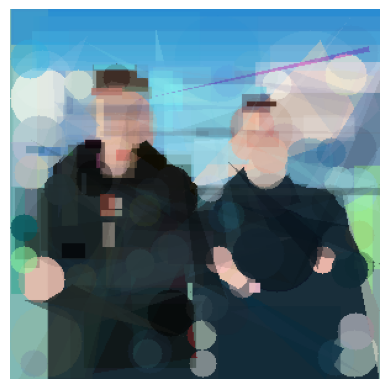

Evolution stage 29 of iteration 204, best score 0.8203795358160778, Area: 1519.9999999999993


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [7]:
# CURRENT VERSION 6 (Optimization)

import random
import math as mt
import numpy as np
from PIL import Image
import matplotlib.image as image
from matplotlib import pyplot as plt
import copy
import operator
from IPython.display import clear_output
import _pickle as cPickle
import time
import cv2

random.seed(30)
T = 3 # tolerance to accept small figures
L = 255
eps = 0.1
# (coordinates - [x,y])

alpha_v = [0.1, 0.5, 0.9]

class Point2D:
        
    def __init__(self,*,borders = [0, 0], coords = [-1, -1]):
        if coords != [-1, -1] and borders == [0, 0]:
            self.x = coords[0]
            self.y = coords[1]
            self.c = coords
        else:
            self.x = random.randint(0, borders[0]-1)
            self.y = random.randint(0, borders[1]-1)
            self.c = [self.x, self.y]
    
    def get_l(self):
        return mt.hypot(self.x, self.y)
        
    def sort(points):
        l_list = [p.get_l() for p in points]
        points = [Point2D(coords = coord[::-1]) for coord in sorted(zip([point.y for point in points], [point.x for point in points]))]
        return points
    
    def cross(self, point):
        self.x = int((self.x + point.x)/2)
        self.y = int((self.y + point.y)/2)
        self.c = [self.x, self.y]
        return self
    
    def mutate(self, borders, mut_power):
        self.x = int(max(min(self.x * (random.random()*(mut_power*2)+(1-mut_power)), borders[0]-1),0))
        self.y = int(max(min(self.y * (random.random()*(mut_power*2)+(1-mut_power)), borders[1]-1),0))
        return self
    
    def to_list(self):
        return [self.x, self.y]
    
    def get_diff(self, point):
        return mt.hypot(self.x - point.x, self.y - point.y) 
        

class Circle:
    
    def __init__(self, borders, limit):
        self.c = Point2D(borders = borders)
        # self.r = random.randint(0, int(max(borders[0], borders[1])/2))
        self.r = random.randint(0, np.min([abs(self.c.x-borders[0]+1), abs(self.c.y-borders[1]+1),max(self.c.x-1,0), max(self.c.y-1,0)]))
        if limit == 1:
            self.rgb = [random.random(), random.random(), random.random()]
        else:
            self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
        self.a = random.choice(alpha_v)
        # self.to_string()
    
    def to_string(self):
        print('I AM CIRCLE')
        print(f'radius {self.r}')
        print(f'center {self.c.x} {self.c.y}')
        print(f'a {self.a}')
        print(f'rgb {self.rgb}')
        
    def get_area(self):
        return 2*mt.pi*(self.r**2)
    
    def get_borders(self):
        h = 2 * self.r + 1
        w = 2 * self.r + 1
        return h,w
    
    def get_shift(self):
        return (self.c.y-self.r - 1, self.c.x-self.r - 1)
     
    def draw_figure(self):
        h,w = self.get_borders()
        # A = np.arange(-self.c.y + 1,h - self.c.y + 1)**2
        # B = np.arange(-self.c.x + 1,w - self.c.x + 1)**2
        # A = np.arange(0,h)**2
        # B = np.arange(0,w)**2
        A = np.arange(- np.ceil(h/2) + 1,h - np.ceil(h/2) + 1)**2
        B = np.arange(- np.ceil(w/2) + 1,w - np.ceil(w/2) + 1)**2
        dists = np.sqrt(A[:,None] + B)
        matrix = (dists <= self.r).astype(np.uint8)
        matrix = np.array([matrix*self.rgb[0], matrix*self.rgb[1], matrix*self.rgb[2]])
        matrix = np.transpose(matrix, axes = (1,2,0))
        return matrix, self.get_shift()
    
    def check_belonging(self, point):
        if (mt.hypot(point.x - self.c.x, point.y - self.c.y) < self.r):
            return True
        else:
            return False
    
    def cross(self, fig, cross_power):
        if random.random() > 0.5:
            self.c.cross(fig.c)
            self.r = int((self.r + fig.r)/2)
        else:
            self.rgb = [np.random.choice(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [np.mean(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [(x*(1-cross_power)+y*cross_power) for x,y in zip(self.rgb, fig.rgb)]
            # self.rgb = fig.rgb
            self.a = (fig.a + fig.a)/2
        return self
    
    def mutate(self, borders, mut_power):
        if random.random() > 0.5:
            self.r = int(min(self.r * (random.random()*(mut_power*2)+(1-mut_power)), min((borders[1]-1)/2,(borders[0]-1)/2)))
            self.c = self.c.mutate(borders, mut_power)
            self.c = Point2D(borders = [0,0], coords = [max(min(self.c.x,borders[0]-self.r-1), self.r+1), max(min(self.c.y,borders[1]-self.r-1), self.r+1)])
        else:
            self.rgb = [int(max(min(elem*(random.random()*(mut_power*2)+(1-mut_power)),L),0)) for elem in self.rgb]
            self.a = random.choice(alpha_v)
        return self
    
class Triangle:
    
    def __init__(self, borders, limit):
        self.v_list = [Point2D(borders = borders), Point2D(borders = borders), Point2D(borders = borders)]
        if limit == 1:
            self.rgb = [random.random(), random.random(), random.random()]
        else:
            self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
        self.a = random.choice(alpha_v)
        self.c = Point2D(coords = [np.mean(np.array(k)) for k in zip(self.v_list[0].c, self.v_list[1].c, self.v_list[2].c)])
        # self.to_string()
    
    def to_string(self):
        print('I AM TRIANGLE')
        print([[vertex.x, vertex.y] for vertex in self.v_list])
        print(f'a {self.a}')
        print(f'rgb {self.rgb}')
        
    def get_area(self):
        side_ls = [((p1.x-p2.x)**2+(p1.y-p2.y)**2)**0.5 for p1, p2 in zip(self.v_list, self.v_list[1:]+self.v_list[:1])]
        hp = sum(side_ls)/2
        self.area = (hp*np.prod([hp-ls for ls in side_ls]))**0.5
        return self.area
    
    def get_borders(self):
        h = max([point.y for point in self.v_list])-min([point.y for point in self.v_list]) + 1
        w = max([point.x for point in self.v_list])-min([point.x for point in self.v_list]) + 1
        return h,w
    
    def get_shift(self):
        return (min([point.y for point in self.v_list]),min([point.x for point in self.v_list]))
    
    def draw_figure(self):
        h,w = self.get_borders()
        shift = self.get_shift()
        points = [np.subtract(point.to_list(), shift[::-1]) for point in self.v_list]
        matrix = np.ones((h,w), dtype = bool)
        for p1, p2, p3 in zip(points, points[1:]+points[:1], points[2:]+points[:2]):
            delta = np.subtract(p1,p2)
            delta[1] = -delta[1]
            A = delta[0]*np.arange(0,h)
            B = delta[1]*np.arange(0,w)
            b = np.dot(delta[::-1], p1)
            if (delta[0]*p3[1]+delta[1]*p3[0] - b) >= 0:
                dists = (((A[:,None] + B) - b) >= 0)
            else:
                dists = (((A[:,None] + B) - b) <= 0)
            matrix = np.logical_and(matrix, dists)
        matrix = matrix.astype(np.uint8)
       
        matrix = np.array([matrix*self.rgb[0], matrix*self.rgb[1], matrix*self.rgb[2]])
        matrix = np.transpose(matrix, axes = (1,2,0))
        return matrix, shift
    
    def cross(self, fig, cross_power):
        if random.random() > 0.5:
            for v in self.v_list:
                v.cross(fig.v_list[np.argmin([v.get_diff(v2) for v2 in fig.v_list])])
            self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c, self.v_list[2].c)])
            # self.v_list[0].cross(trian.v_list[0])
            # self.v_list[1].cross(trian.v_list[1])
            # self.v_list[2].cross(trian.v_list[2])
        else:
            self.rgb = [np.random.choice(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [np.mean(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [(x*(1-cross_power)+y*cross_power) for x,y in zip(self.rgb, fig.rgb)]
            # self.rgb = fig.rgb
            # self.a = (self.a + trian.a)/2
            
            # self.rgb = trian.rgb
            self.a = fig.a
            
        return self

#     def cross(self, trian):
#         if random.random() > 0.5:
#             # for v in self.v_list:
#                 # v.cross(trian.v_list[np.argmin([v.get_diff(v2) for v2 in trian.v_list])])
#             self.v_list = trian.v_list
#         else:
#             self.rgb = trian.rgb
#             self.a = trian.a

#         return self
    
    def mutate(self, borders, mut_power):
        if random.random() > 0.5:
            vertex1 = self.v_list[0].mutate(borders, mut_power)
            vertex2 = self.v_list[1].mutate(borders, mut_power)
            vertex3 = self.v_list[2].mutate(borders, mut_power)
            self.v_list = Point2D.sort([vertex1, vertex2, vertex3])
            self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c, self.v_list[2].c)])
        #[min(elem*(random.random()*(mut_power*2)+(1-mut_power)),L) for elem in self.rgb]
        else: 
            self.rgb = [int(max(min(elem*(random.random()*(mut_power*2)+(1-mut_power)),L),0)) for elem in self.rgb]
            self.a = random.choice(alpha_v)
        return self

        
class Rectangle:
        
    def __init__(self, borders, limit):
        vertex1 = Point2D(borders = borders)
        vertex2 = Point2D(borders = borders)
        
        self.v_list = [Point2D(coords = [min(vertex1.x, vertex2.x), min(vertex1.y, vertex2.y)]),
                       Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
        if limit == 1:
            self.rgb = [random.random(), random.random(), random.random()]
        else:
            self.rgb = [random.randint(0, limit), random.randint(0, limit), random.randint(0, limit)]
        self.a = random.choice(alpha_v)
        self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c)])
        # self.to_string()
        
    def to_string(self):
        print('I AM RECTANGLE')
        print ([[vertex.x, vertex.y] for vertex in self.v_list])
        print(f'a {self.a}')
        print(f'rgb {self.rgb}')
    
    def get_area(self):
        return (self.v_list[1].x - self.v_list[0].x) * (self.v_list[1].y - self.v_list[0].y)
        
    def get_borders(self):
        h = self.v_list[1].y - self.v_list[0].y + 1
        w = self.v_list[1].x - self.v_list[0].x + 1
        return h,w
    
    def get_shift(self):
        return (self.v_list[0].y, self.v_list[0].x)

    def draw_figure(self):
        h,w = self.get_borders()
        # print(h,w)
        # print(h,w)
        matrix = np.array([np.full((h,w), fill_value=self.rgb[0]),np.full((h,w), fill_value=self.rgb[1]), np.full((h,w), fill_value=self.rgb[2])])
        matrix = np.transpose(matrix, axes = (1,2,0))
        
        return matrix, self.get_shift()
    
    def check_belonging(self, point):
        if (point.x > self.v_list[0].x and point.x < self.v_list[1].x and
            point.y > self.v_list[0].y and point.y < self.v_list[1].y): 
            return True
        else:
            return False
        
    def cross(self, fig, cross_power):
        if random.random() > 0.5:
            # self.v_list[0].cross(fig.v_list[0])
            # self.v_list[1].cross(fig.v_list[1])
            # self.v_list = [Point2D(coords = [min(self.v_list.x, vertex2.x), min(vertex1.y, vertex2.y)]),
            #                Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
            
            vertex1 = self.v_list[0].cross(fig.v_list[0])
            vertex2 = self.v_list[1].cross(fig.v_list[0])
            self.v_list = [Point2D(coords = [min(vertex1.x, vertex2.x), min(vertex1.y, vertex2.y)]),
                           Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
            
            self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c)])
        else:
            self.rgb = [np.random.choice(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [np.mean(k) for k in zip(self.rgb, fig.rgb)]
            # self.rgb = [(x*(1-cross_power)+y*cross_power) for x,y in zip(self.rgb, fig.rgb)]
            # self.rgb = fig.rgb
            self.a = (self.a+fig.a)/2
        return self
        
    def mutate(self, borders, mut_power):
        if random.random() > 0.5:
            vertex1 = self.v_list[0].mutate(borders, mut_power)
            vertex2 = self.v_list[1].mutate(borders, mut_power)
            self.v_list = [Point2D(coords = [min(vertex1.x, vertex2.x), min(vertex1.y, vertex2.y)]),
                           Point2D(coords = [max(vertex1.x, vertex2.x), max(vertex1.y, vertex2.y)])]
            
            # print(self.v_list[0].x, self.v_list[1].x, self.v_list[0].y, self.v_list[1].y)
            
            # self.rgb = [min(elem*(random.random()*(mut_power*2)+(1-mut_power)),255) for elem in self.rgb]
            self.c = Point2D(coords = [np.mean(k) for k in zip(self.v_list[0].c, self.v_list[1].c)])
        else:
            self.rgb = [int(max(min(elem*(random.random()*(mut_power*2)+(1-mut_power)),L),0)) for elem in self.rgb]
            self.a = random.choice(alpha_v)
        return self
        #self.to_string()
        
    
class Approximation:
                
    def __init__(self, borders, min_area, limit):
        self.figure = None
        self.borders = borders
        self.lim = limit
        # self.buf_image = [[[] for j in range(self.borders[0])] for i in range(self.borders[1])]
        self.min_area = min_area
        self.matrix = None
        self.error_matrix = None
        
    def random_figure(self, fig_type, tolerance=T):
        i=0
        area = 0
        while area < self.min_area and i < tolerance:
            if fig_type == 'c':
                self.figure = Circle(self.borders, self.lim)
            if fig_type == 't':
                self.figure = Triangle(self.borders, self.lim)
            if fig_type == 'r':
                self.figure = Rectangle(self.borders, self.lim)
            area = self.figure.get_area()
            i+=1
            # print(area, self.borders[0]*self.borders[1]/32)
    
    def set_figure(self, figure):
        self.figure = figure
            
    # def delete_last_figure(self):
    #     return self.f_list.pop()
        
    def generate_image(self, base_image):
        self.matrix = cPickle.loads(cPickle.dumps(base_image, -1))
        if self.figure.get_area() > 0:
            fm, shift = self.figure.draw_figure()
            amat = (fm>0)*self.figure.a
            amat[self.matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
            self.matrix[shift[0]:shift[0]+len(fm), 
                        shift[1]:shift[1]+len(fm[0]), :] = self.matrix[shift[0]:shift[0]+len(fm), 
                                                                       shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
        return self.matrix.astype(np.uint8)
                
        
    def get_matrix(self):                 
        return self.matrix
    
    def get_error_matrix(self):
        return self.error_matrix
    
    def calculate_error(self, image_matrix, type_of_error):
        # self.error_matrix = np.zeros((self.borders[1], self.borders[0], 3))
        # self.error_matrix = image_matrix - self.matrix
        # self.error_matrix[self.error_matrix < 0] = self.error_matrix[self.error_matrix < 0]**4
        self.error_matrix = np.absolute(image_matrix - self.matrix)
        if type_of_error == "SSD":
            self.error = np.sum(self.error_matrix**2)
        if type_of_error == "SAD":
            self.error = np.sum(self.error_matrix)
        # self.error_matrix = (self.error_matrix-np.min(self.error_matrix))/(np.max(self.error_matrix)-np.min(self.error_matrix))*self.lim
        return self.error, self.error_matrix
    
    
    def cross(self, base_image, aprx, cross_power):
        a = cPickle.loads(cPickle.dumps(self, -1))
        a.figure.cross(aprx.figure, cross_power)
        # a.generate_image(base_image)
        return a
    
    def mutate(self, base_image, mut_power, tolerance=T):
        a = cPickle.loads(cPickle.dumps(self, -1))
        
        #a.f_list[iteration] = a.f_list[iteration].cross(type(a.f_list[iteration])(self.border, self.lim))
        area = 0;
        i=0;
        while area < self.min_area and i < tolerance:
            last_figure = copy.deepcopy(a.figure).mutate(self.borders, mut_power)
            area = last_figure.get_area() 
            i+=1;
           
        a.figure = last_figure
        # print(a.figure.v_list[0].x, a.figure.v_list[1].x, a.figure.v_list[0].y, a.figure.v_list[1].y)
        # a.generate_image(base_image)
        return a
        
                    
        
class GeneticAlgorithm:
    def __init__(self, img, n_generations, n_entities, n_figures, name):
        self.borders = [img.shape[1], img.shape[0]]
        self.lim = L
        self.n_entities = n_entities
        self.n_generations = n_generations
        self.n_figures = n_figures
        self.img = img
        self.entities = []
        self.min_area = self.borders[0]*self.borders[1]/64
        for i in range(n_entities):
            self.entities.append(Approximation(self.borders, self.min_area, self.lim))
        self.name = name

        self.f_list = []
        self.matrix = np.zeros((self.borders[1], self.borders[0], 3)).astype(np.uint8) # all the approximations are based here
        
    def update_buf(self):
        figure = self.entities[0].figure
        self.f_list.append(figure)
        fm, shift = figure.draw_figure()
        amat = (fm>0)*figure.a
        amat[self.matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
        self.matrix[shift[0]:shift[0]+len(fm), 
                    shift[1]:shift[1]+len(fm[0]), :] = self.matrix[shift[0]:shift[0]+len(fm), 
                                                                   shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
        self.matrix = self.matrix.astype(np.uint8)
        
    def evolution(self, n_selections, cross_prob, cross_power, mut_prob, mut_power, selection_type, elitism_num):
        si = np.sum(self.img)
        min_score = si
        
        _types = ['c', 't', 'r']
        fig_types = []
        n_fig_left = copy.deepcopy(self.n_figures)
        for i in range(self.n_figures[0] + self.n_figures[1] + self.n_figures[2]):
            fig_types = [_types[i] for i in range(len(_types)) if n_fig_left[i] > 0]
            scores = {}
            best_score = [si, 'c']
            # print(fig_types)
            # print(n_fig_left)
            for fig_type in fig_types:
                for k in range(self.n_entities):
                    self.entities[k].random_figure(fig_type)
                    self.entities[k].generate_image(self.matrix)
                j = 0
                self.fitness()
                while j < self.n_generations/8:
                    self.selection(n_selections, selection_type, elitism_num)
                    self.crossingover(cross_prob, cross_power)
                    self.mutation(mut_prob, elitism_num, mut_power)
                    self.fitness()
                    j += 1
                    # clear_output(wait=True)
                    # self.visualize_all()
                    # self.visualize(False)
                # self.visualize_all()
                scores[fig_type] = self.errors[0]  
                if best_score[0] > scores[fig_type]:
                    best_score = [scores[fig_type], fig_type]
                    temp_list = []
                    for k in range(self.n_entities):
                        temp_list.append(cPickle.loads(cPickle.dumps(self.entities[k].figure, -1)))
                    
                    # best_list = cPickle.loads(cPickle.dumps(temp_list, -1)) # new
            # print(f'Best score ({best_score[0]}) was achieved with {best_score[1]}')
            # print(scores)
            # time.sleep(5)
            for k in range(self.n_entities):
                self.entities[k].set_figure(temp_list[k]) # TODO
                # self.entities[k].generate_image(self.matrix)

            unchanged_c = 0
            j = 0
            self.fitness()
            temp = self.errors[0]
            while (j < self.n_generations or self.errors[0] > min_score) and unchanged_c < self.n_generations/4:
                
                self.selection(n_selections, selection_type, elitism_num)
                #print('sel', len(self.entities))
                self.crossingover(cross_prob, cross_power)
                #print('cross', len(self.entities))
                #print('mut', len(self.entities))
                self.mutation(mut_prob, elitism_num, mut_power)
                self.fitness()
                if abs(temp-self.errors[0]) < eps:
                    unchanged_c += 1
                else:
                    unchanged_c = 0
                temp = self.errors[0]
                j += 1
                self.metrics = (si-self.errors[0])/si
                area = self.entities[0].figure.get_area()
                title = f"Evolution stage {j} of iteration {i}, best score {self.metrics}, Area: {area}"
                # self.visualize(title)
                
                self.visualize(title)
                # print(n_fig_left)
                
            if min_score <= self.errors[0]+eps:
                i-=1
                continue
                
            n_fig_left[_types.index(best_score[1])] -= 1
            min_score = self.errors[0]
            self.update_buf()
            self.visualize(title, True)
            # print(f"Evolution stage {j} of iteration {i}, best score {(si-self.errors[0])/si}, Area: {self.entities[0].f_list[-1].get_area()}")
            
        # self.fig_prune()
        self.visualize_final(title)
        # print(min_score)
        # print(self.errors)
        # print(self.to_keep)
        # self.show_removed()
            
    def fitness(self):
        self.errors = []
        for i in range(len(self.entities)):
            self.entities[i].generate_image(self.matrix)
            self.errors.append(self.entities[i].calculate_error(self.img, 'SAD')[0])
        return self.errors[0]
    
    def selection(self, n_selections, selection_type, elitism_num):
        self.errors, self.entities =  zip(*sorted(zip(self.errors, self.entities), key=operator.itemgetter(0)))
        self.entities = list(self.entities)
        #print(self.errors[0:10])
        temp_list = []
        if selection_type == 'roulette':
            probabilities = [((max(self.errors) + eps - err) / ((max(self.errors) + eps) * len(self.errors) - sum(self.errors))) for err in self.errors]
            include_list = np.zeros(len(self.entities))
            while len(temp_list) < n_selections:
                rnd = random.random()
                j = -1
                temp_p = 0
                while temp_p <= rnd:
                    temp_p += probabilities[j]
                    j += 1
                if include_list[j] == 0:
                    temp_list.append(self.entities[j])
                    include_list[j] = 1
                    #print(include_list)
                    
        elif selection_type == 'tournament':
            while len(temp_list) < n_selections:
                rnd_list = random.sample(self.errors, 2)
                temp_list.append(cPickle.loads(cPickle.dumps(self.entities[self.errors.index(min(rnd_list))], -1)))
        # self.entities[(n_selections+elitism_num):] = []
        self.entities[elitism_num:] = temp_list # (n_selections+elitism_num)


    def crossingover(self, cross_prob, cross_power, tolerance=T):
        temp_list = []
        # while len(temp_list) < self.n_entities:
        #     A, B = random.sample(range(0, len(self.entities)), 2)
        #     temp_list.append(self.entities[A].cross(self.entities[B], cross_prob))
        # self.entities = temp_list
        # areas = [entity.f_list[-1].get_area() for entity in self.entities]
        # if np.max(areas) < self.entities[0].min_area:
        #     while len(self.entities) < self.n_entities:
        #         self.entities.append(copy.copy(self.entities[0]))
        #     return 0
        
        while len(self.entities) < self.n_entities:
            for i in range(tolerance):
                A, B = random.sample(range(0, len(self.entities)), 2)
                C = self.entities[A].cross(self.matrix, self.entities[B], cross_power)
                if C.figure.get_area() > self.entities[A].min_area:
                    break
            self.entities.append(C)
        return 1

    def mutation(self, prob, elitism_num, mut_power):
        # self.errors, self.entities =  zip(*sorted(zip(self.errors, self.entities), key=operator.itemgetter(0)))
        # self.entities = list(self.entities)
        for i in range(elitism_num, len(self.entities)): # elitism_num
            #if random.random() < prob**(0.2)*(i)/(self.n_entities-1):
            if random.random() < prob:
                #print(i)
                self.entities[i] = self.entities[i].mutate(self.matrix, mut_power)

                
    def visualize(self, title, save=False):
        matrix = self.entities[0].get_matrix()
        # print(np.max(matrix), np.min(matrix))
        plt.imshow(matrix) 
        plt.axis('off')
        if save:
            plt.savefig(f"Approximations/{self.name}_{self.metrics:.5f}.png", transparent=True)
        # plt.figure(figsize=(12,4), dpi = 80)
        # plt.subplot(1,3,1)
        # plt.imshow(matrix)
        # plt.axis('off')
        # plt.subplot(1,3,2)
        # plt.imshow(self.entities[0].get_error_matrix())
        # plt.axis('off')
        # plt.subplot(1,3,3)
        # plt.imshow(self.entities[0].get_error_matrix()+matrix)
        # plt.axis('off')
        # plt.savefig(name+' '+str(int(self.errors[0])))
        clear_output(wait=True)
        plt.show()
        # plt.draw_idle()
        print(title, flush=True)

    def visualize_final(self, title):
        clear_output(wait=True)
        
        plt.imshow(self.matrix)
        plt.axis('off')
        plt.savefig(f"Best_approximations/{self.name}_{self.metrics:.5f}.png", transparent=True)
        plt.show()
        print(title, flush=True)
        # time.sleep(0.01)
            
    def visualize_all(self):
        clear_output(wait=True)
        grid_size = int(self.n_entities**0.5)
        figure, axis = plt.subplots(grid_size, grid_size, figsize=(5, 5), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
        for i, entity in enumerate(self.entities):
            axis[i//grid_size, i%grid_size].imshow(entity.get_matrix())
            axis[i//grid_size, i%grid_size].axis('off')
        # plt.subplots_adjust(wspace=0, hspace=0)
        plt.show()
        
            

    def list_mutation(self, tlist, mut_power):
        tlist = [elem*(random.random()*(mut_power*2)+(1-mut_power)) for elem in tlist]
        return tlist
    
    def delete_duplicates(self):
        self.entities = list(dict(zip(self.errors, self.entities)).values())
        #print(self.entities)
        
    def get_best(self):
        return self.entities[0]

    def generate_image_fs(self, f_list):
        matrix = np.zeros((self.borders[1], self.borders[0], 3)).astype(np.uint8)
        for fig in f_list:
            fm, shift = fig.draw_figure()
            amat = (fm>0)*fig.a
            amat[matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :]==0] = 1 
            matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] = matrix[shift[0]:shift[0]+len(fm), shift[1]:shift[1]+len(fm[0]), :] * (1-amat) + fm * amat
        return matrix

    
    def calculate_error(self, type_of_error):
        # self.error_matrix = np.zeros((self.borders[1], self.borders[0], 3))
        # self.error_matrix = self.img - self.matrix
        # self.error_matrix[self.error_matrix < 0] = self.error_matrix[self.error_matrix < 0]**4
        self.error_matrix = np.absolute(self.img - self.matrix)
        if type_of_error == "SSD":
            self.error = np.sum(self.error_matrix**2)
        if type_of_error == "SAD":
            self.error = np.sum(self.error_matrix)
        # self.error_matrix = (self.error_matrix-np.min(self.error_matrix))/(np.max(self.error_matrix)-np.min(self.error_matrix))*self.lim
        return self.error, self.error_matrix
        
    def fig_prune(self):
        gen_error, gen_err_matrix = self.calculate_error("SAD")
        self.to_keep = np.ones(len(self.f_list)).astype(bool)
        self.errors = []
        ratios = []
        error_matrices = [gen_err_matrix]
        for i in range(len(self.f_list)):
            self.matrix = self.generate_image_fs(self.f_list[:i]+self.f_list[i+1:])
            error, error_matrix = self.calculate_error("SAD")
            self.errors.append(error)
            ratios.append(int(((error/gen_error)*1000))/1000)
            error_matrices.append(error_matrix)
            if ratios[-1] <= 1:
                self.to_keep[i] = 0
        # print(errors)
        # print(to_keep)
        self.removed_f = (np.array(self.f_list)[np.logical_not(self.to_keep)]).tolist()
        self.f_list = (np.array(self.f_list)[self.to_keep]).tolist()
        self.matrix = self.generate_image_fs(self.f_list)
        return self.errors, self.to_keep, error_matrices, gen_error

    def show_removed(self):
        aprx = Approximation(self.borders, self.min_area, self.lim)
        temp_matrix = np.zeros((self.borders[1], self.borders[0], 3)).astype(np.uint8)
        for figure in self.removed_f:
            aprx.set_figure(figure)
            m = aprx.generate_image(temp_matrix)
            plt.imshow(m)
            plt.axis('off')
            plt.show()
    
direct = "Resources/"    
name = 'crazraby'
img = plt.imread(direct+name+'.png', format=".png")
# img = cv2.imread(direct+name+'.png')
#img = cv2.imread('your_image.jpg')
A = 300
img = cv2.resize(img, dsize=(A,A*img.shape[0]//img.shape[1]))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()
# print((img[:, :, :3]*L).astype(np.uint8))
# print(img[:, :, :3]*L)
# img, n_generations, n_entities, n_figures, name
e = GeneticAlgorithm((img[:, :, :3]*L).astype(np.int16), 150, 128, [75,75,75], name)
# n_selections, cross_prob, cross_power mut_prob, mut_power, selection_type, elitism_num
# 32, 1, 0.7, 0.5, 0.5, 'roulette', 4

#  150, 128, [50,50,50] // 8, 1, 0.3, 0.1, 0.3, 'roulette', 1
e.evolution(8, 1, 0.4, 0.1, 0.5, 'tournament', 3) # 10, 0.5, 0.4, 0.9, 'tournament', 3

In [16]:
print(np.min(e.entities[0].matrix))

0


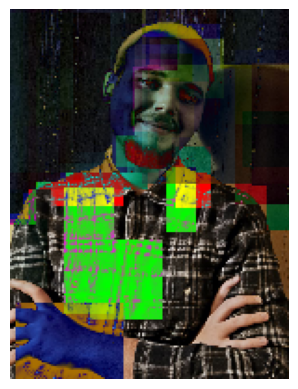

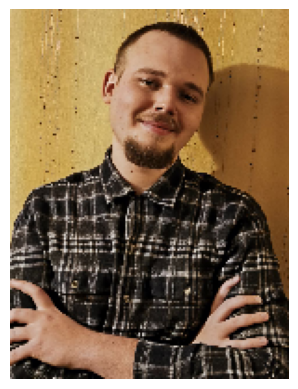

(199, 150, 3)


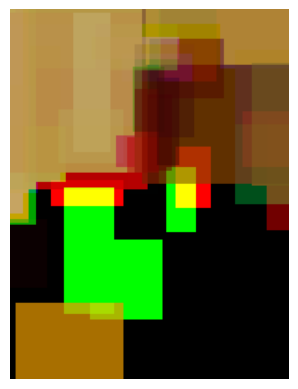

In [45]:
plt.imshow(np.abs((e.img.astype(np.int16)-e.matrix)))
plt.axis("off")
plt.show()

plt.imshow(e.img)
plt.axis("off")
plt.show()

print(e.matrix.shape)
plt.imshow(e.matrix)
plt.axis("off")
plt.show()

In [17]:
print(len(e.f_list))

92


In [15]:
(img[:, :, :]*L).astype(np.uint8)

array([[[215, 193, 135],
        [204, 178, 120],
        [211, 182, 123],
        ...,
        [178, 131,  59],
        [178, 131,  59],
        [186, 139,  67]],

       [[212, 190, 130],
        [205, 179, 118],
        [207, 178, 118],
        ...,
        [182, 135,  63],
        [188, 141,  69],
        [191, 144,  72]],

       [[214, 188, 128],
        [210, 183, 121],
        [210, 182, 118],
        ...,
        [183, 136,  64],
        [180, 133,  61],
        [191, 144,  72]],

       ...,

       [[ 89,  80,  72],
        [122, 114, 108],
        [ 37,  33,  28],
        ...,
        [ 37,  30,  20],
        [ 13,  12,   9],
        [ 22,  16,   8]],

       [[ 78,  69,  64],
        [113, 103,  98],
        [ 50,  48,  42],
        ...,
        [ 27,  20,  12],
        [  9,   9,   7],
        [ 23,  17,   9]],

       [[155, 146, 141],
        [ 75,  64,  60],
        [ 55,  53,  47],
        ...,
        [ 11,   8,   3],
        [ 13,  13,  11],
        [ 26,  15,   5]]